### Data Preprocessing

Import the dataset from UCIML

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
land_mines = fetch_ucirepo(id=763) 
  
# data (as pandas dataframes) 
X = land_mines.data.features 
y = land_mines.data.targets 
  
# metadata 
print(land_mines.metadata) 
  
# variable information 
print(land_mines.variables) 


{'uci_id': 763, 'name': 'Land Mines', 'repository_url': 'https://archive.ics.uci.edu/dataset/763/land+mines-1', 'data_url': 'https://archive.ics.uci.edu/static/public/763/data.csv', 'abstract': 'Detection of mines buried in the ground is very important in terms of safety of life and property. Many different methods have been used in this regard; however, it has not yet been possible to achieve 100% success. Mine detection process consists of sensor design, data analysis and decision algorithm phases. The magnetic anomaly method works according to the principle of measuring the anomalies resulting from the object in the magnetic field that disturbs the structure of it, the magnetic field, and the data obtained at this point are used to determine the conditions such as motion and position. The determination of parameters such as position, depth or direction of motion using magnetic anomaly has been carried out since 1970.', 'area': 'Engineering', 'tasks': ['Classification', 'Clustering']

Save the Dataset in CSV Format

In [ ]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

# Fetch dataset
land_mines = fetch_ucirepo(id=763)

# Combine features and targets
df = pd.concat([land_mines.data.features, land_mines.data.targets], axis=1)

# Save as CSV
df.to_csv("land_mines_dataset.csv", index=False)
print("Dataset saved as land_mines_dataset.csv.")


Check Dataset Information

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("land_mines_dataset.csv")

# Summary statistics
summary_stats = df.describe()
print(summary_stats)

# Save statistics
summary_stats.to_csv("eda_summary.csv")
print("EDA summary saved.")


Check for Missing Values

In [ ]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

# Fetch dataset
land_mines = fetch_ucirepo(id=763)
X = land_mines.data.features
y = land_mines.data.targets

# Check for missing values
missing_values = X.isnull().sum()
print("Missing Values Per Column:\n", missing_values)




Missing Values Per Column:
 V    0
H    0
S    0
dtype: int64
Missing values handled and saved.


Check for Duplicate Values

In [8]:
import pandas as pd

# Load dataset
df = pd.read_csv("land_mines_dataset.csv")

# Check and remove duplicates
duplicates = df.duplicated().sum()
print(f"Total Duplicates: {duplicates}")


Total Duplicates: 0


Check for Outliers using IQR Method

In [14]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

# Fetch dataset
land_mines = fetch_ucirepo(id=763)

# Convert to DataFrame
df = land_mines.data.features
df['M'] = land_mines.data.targets  # Adding target column

# Function to detect outliers using IQR
def detect_outliers(df):
    outliers = pd.DataFrame()
    for col in df.columns:
        if df[col].dtype in ['float64', 'int64']:  # Only for numerical columns
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers_in_col = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            outliers = pd.concat([outliers, outliers_in_col])
    
    return outliers.drop_duplicates()

# Show outliers
outlier_df = detect_outliers(df)
print("Outliers in the dataset:")
print(outlier_df)


Outliers in the dataset:
            V         H    S  M
47   0.999999  0.000000  0.0  2
48   0.999999  0.090909  0.0  2
49   0.999999  0.272727  0.0  2
50   0.906343  0.363636  0.0  2
55   0.999999  0.000000  0.6  2
56   0.999999  0.090909  0.6  2
57   0.975830  0.272727  0.6  2
58   0.815709  0.363636  0.6  2
70   0.999999  0.000000  0.8  2
71   0.912386  0.181818  0.8  2
72   0.957703  0.272727  0.8  2
73   0.758307  0.454545  0.8  2
78   0.999999  0.000000  0.4  2
79   0.999999  0.181818  0.4  2
80   0.999999  0.272727  0.4  2
81   0.999999  0.454545  0.4  2
82   0.999999  0.545455  0.4  2
83   0.854984  0.727273  0.4  2
86   0.999999  0.000000  1.0  2
87   0.891238  0.181818  1.0  2
88   0.999999  0.272727  1.0  2
89   0.809667  0.454545  1.0  2
249  0.999999  0.181818  0.0  2
250  0.788519  0.454545  0.0  2
253  0.999999  0.181818  0.6  2
260  0.999999  0.090909  0.8  2
264  0.999999  0.090909  0.4  2
265  0.999999  0.363636  0.4  2
266  0.851963  0.636364  0.4  2
268  0.993956  

Transform the Dataset using Log Transformation

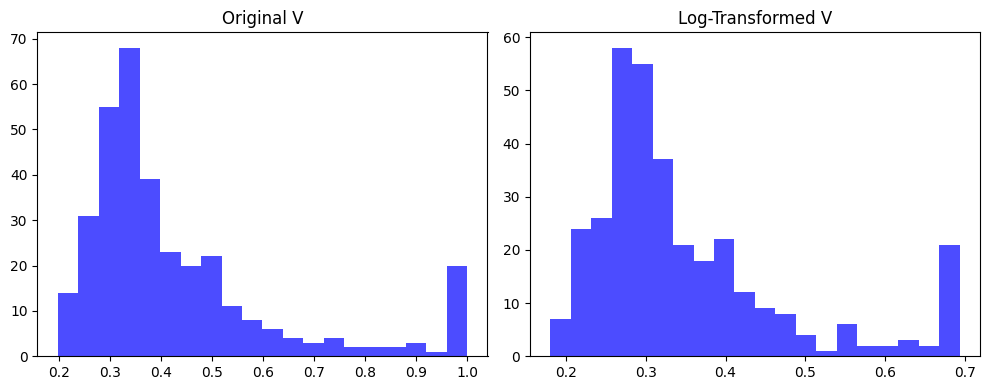

  Feature  Skewness  Kurtosis
0   V_log  1.470299  1.506395
1       H -0.017115 -1.177759
2       S -0.035358 -1.273176


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# Load dataset (Set your correct path)
df = pd.read_csv("land_mines_dataset.csv")  

# Apply log transformation only to V
df['V_log'] = np.log1p(df['V'])  # log1p(x) = log(1 + x) to avoid -inf

# Recalculate skewness and kurtosis
stats_df = pd.DataFrame({
    "Feature": ["V_log", "H", "S"],
    "Skewness": [skew(df['V_log']), skew(df['H']), skew(df['S'])],
    "Kurtosis": [kurtosis(df['V_log']), kurtosis(df['H']), kurtosis(df['S'])]
})

# Save transformed dataset
df.to_csv("transformed_land_mines.csv", index=False)

# Plot original vs log-transformed V distribution
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].hist(df['V'], bins=20, color='blue', alpha=0.7)
axes[0].set_title("Original V")

axes[1].hist(df['V_log'], bins=20, color='blue', alpha=0.7)
axes[1].set_title("Log-Transformed V")

plt.tight_layout()
plt.show()

# Print skewness and kurtosis
print(stats_df)


Show the Final Visualization.

Visualizations saved (excluding V).


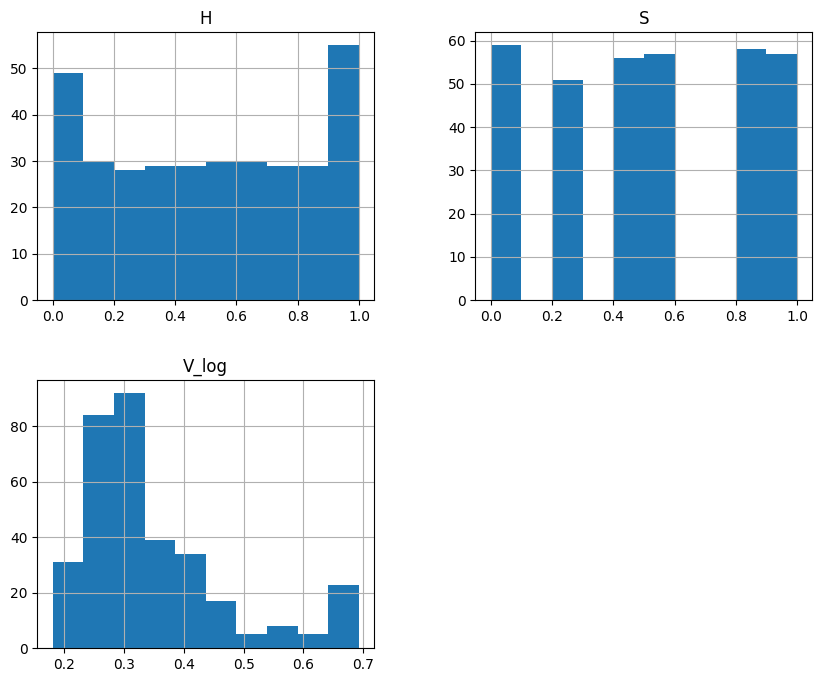

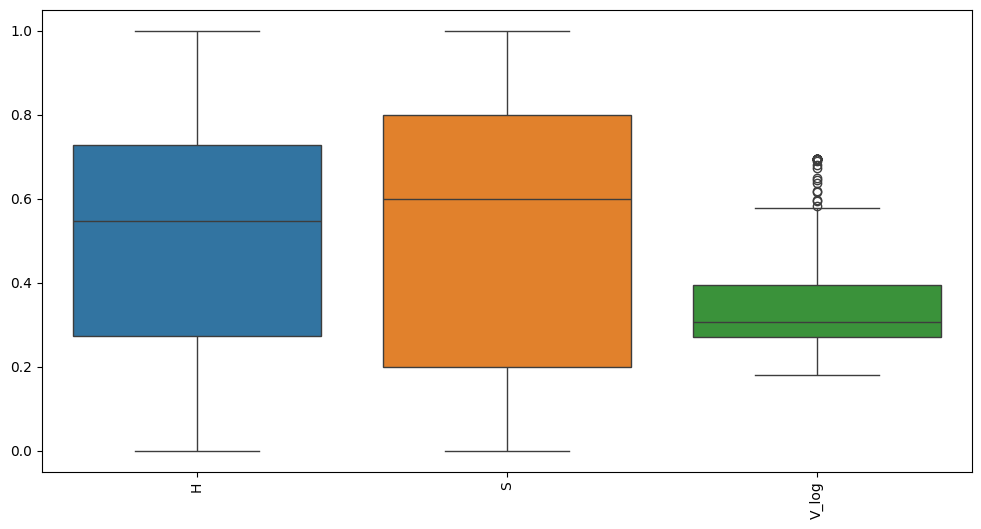

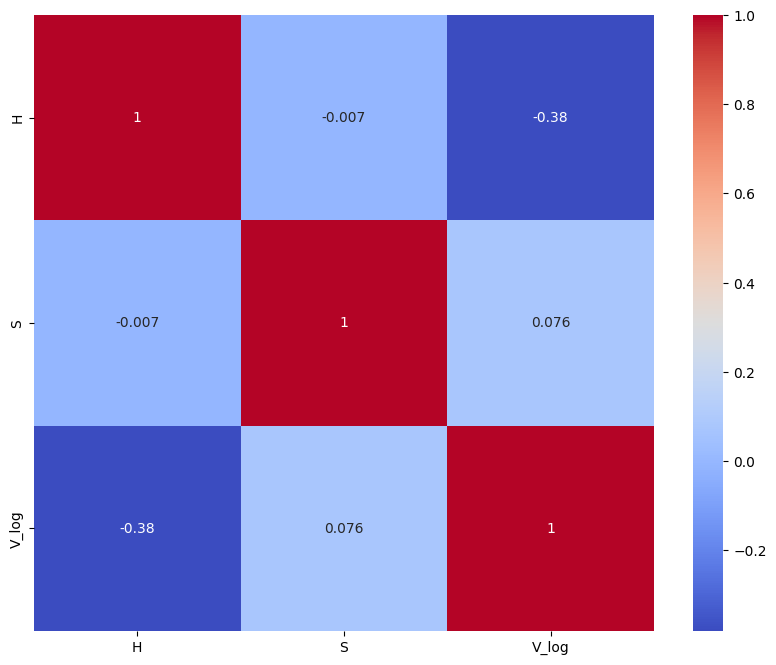

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("transformed_land_mines.csv")

# Exclude "M" (target) and "V" from visualizations
X = df.drop(columns=["M", "V"])

# Histogram
X.hist(figsize=(10, 8))
plt.savefig("histograms_excluding_V.png")

# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=X)
plt.xticks(rotation=90)
plt.savefig("boxplot_excluding_V.png")

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm")
plt.savefig("correlation_heatmap_excluding_V.png")

print("Visualizations saved (excluding V).")


PCA and t-SNE Visualization

/workspaces/FDS_MiniProject/fds/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


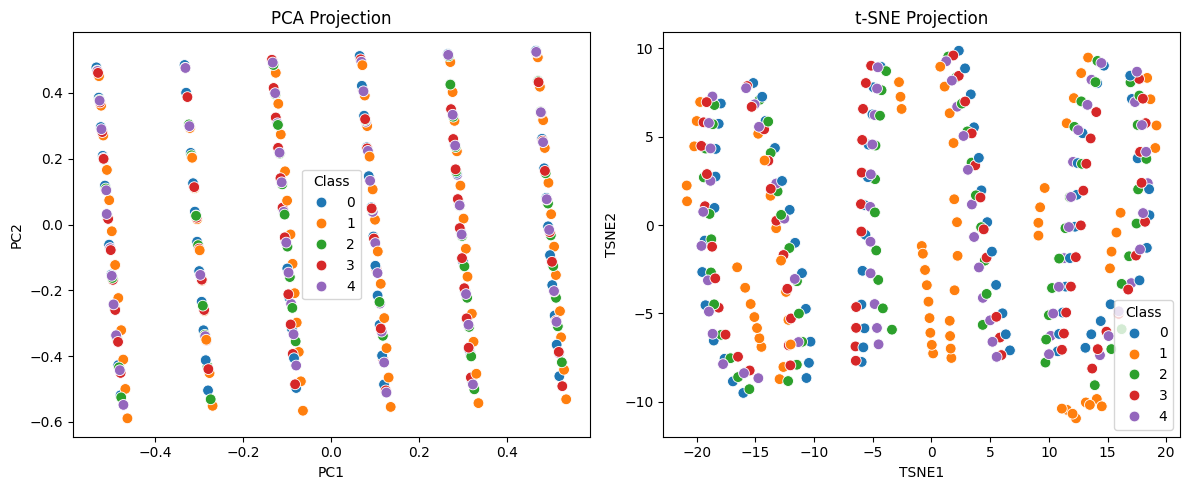

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv("transformed_land_mines.csv")
X = df.drop(columns=["M", "V"])
y = df["M"] - 1

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["label"] = y

# t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X)
tsne_df = pd.DataFrame(X_tsne, columns=["TSNE1", "TSNE2"])
tsne_df["label"] = y

# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="label", palette="tab10", s=60)
plt.title("PCA Projection")
plt.legend(title="Class")

plt.subplot(1, 2, 2)
sns.scatterplot(data=tsne_df, x="TSNE1", y="TSNE2", hue="label", palette="tab10", s=60)
plt.title("t-SNE Projection")
plt.legend(title="Class")

plt.tight_layout()
plt.show()
